## Import the Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

## Importing the dataset

In [79]:
df = sm.datasets.fair.load_pandas().data

About Affair Dataset:
Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

In [80]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [81]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [82]:
# Pedict whether they have affair or not
# so we are creating the affair to 0/1 -- target variable

df['affairs_target'] = df['affairs'].apply(lambda x: 1 if x>0 else 0)

In [83]:
X = df.drop(labels='affairs_target', axis=1)
y = df['affairs_target']

## Explore

**Univariate Analysis**

In [84]:
for c in X.drop('affairs', axis = 1).columns:
  print (c, X[c].unique())

rate_marriage [3. 4. 5. 2. 1.]
age [32.  27.  22.  37.  42.  17.5]
yrs_married [ 9.  13.   2.5 16.5 23.   6.   0.5]
children [3.  0.  4.  1.  5.5 2. ]
religious [3. 1. 2. 4.]
educ [17. 14. 16. 12. 20.  9.]
occupation [2. 3. 5. 4. 1. 6.]
occupation_husb [5. 4. 3. 2. 6. 1.]


- Checking the unique values we also note that there are no 'nan' or missing values.
- Children, yrs_married, age - are continuous.
- rate_marriage, religious, educ, occupation, occupation_husb - are categorical.

**Encode the Categorical Data**

In [85]:
X = pd.get_dummies(data = X, columns = ['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb'])
#to escape dummy variable trap - deg of freedom = n-1 
X.drop(labels = ['rate_marriage_5.0','educ_20.0', 'religious_4.0', 'occupation_6.0', 'occupation_husb_6.0' ], axis = 1,inplace = True) 

In [86]:
d = pd.concat([X,y] , axis = 1)
d.corr()['affairs_target'].sort_values(ascending = False)

affairs_target         1.000000
affairs                0.464046
rate_marriage_3.0      0.210025
yrs_married            0.203109
rate_marriage_2.0      0.160799
children               0.159833
age                    0.146519
rate_marriage_1.0      0.114272
occupation_5.0         0.073766
religious_1.0          0.072103
religious_2.0          0.061692
educ_14.0              0.051659
occupation_3.0         0.045729
educ_12.0              0.036468
educ_9.0               0.021445
occupation_husb_5.0    0.021181
occupation_husb_3.0    0.018884
occupation_husb_2.0    0.003474
rate_marriage_4.0      0.000681
occupation_husb_4.0   -0.011295
occupation_2.0        -0.024613
occupation_1.0        -0.026140
educ_17.0             -0.030295
occupation_husb_1.0   -0.046652
religious_3.0         -0.051279
educ_16.0             -0.077066
occupation_4.0        -0.082706
Name: affairs_target, dtype: float64

**Bivariate Analysis**

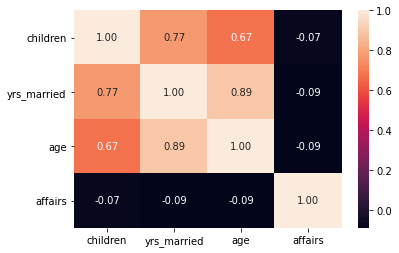

In [87]:
num_feat =['children', 'yrs_married', 'age', 'affairs']
sns.heatmap(df[num_feat].corr(), annot = True, fmt = '.2f')

- There is a strong correlation between age and yrs_married
- There is a correlation between yrs_married and children

## Build Model

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [89]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [90]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[850   0]
 [ 28 396]]


Model has nill type-1 errors - Hence it is not worse and performs good enough!

In [91]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       850
           1       1.00      0.93      0.97       424

    accuracy                           0.98      1274
   macro avg       0.98      0.97      0.97      1274
weighted avg       0.98      0.98      0.98      1274



Model has good precision, recall, accuracy and f1_score.